<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# **SC12x**

# **Statistics**

## **Part 1. Bayes Theorem**

Bayes Thoerem은 사전확률에서 정보가 업데이트됨에 따라 사후확률이 어떻게 변화하는지를 나타냅니다. 

다음의 문제에 대해 Bayes Thoerem을 활용하여 사후확률을 구해보세요.

> 여러분은 가게에서 2개의 사탕팩(A, B)을 구매하였습니다. A팩에는 7개의 딸기맛, 3개의 사과맛 사탕이 들어있고, B팩에는 5개의 딸기맛, 5개의 사과맛 사탕이 들어있었습니다. 해당 사탕들을 모두 섞은 후 1개를 뽑았더니 딸기맛이었을 때, 해당 사탕이 A팩에 있었던 사탕이었을 확률은 얼마일까요?





##### **Q1. 사후확률을 반올림하여 소수점 둘째 자리까지 구한 후, 사전확률과 사후확률 결과를 (사전확률, 사후확률)의 형태로 쓰세요.**

In [1]:
# 사전확률
A = 1/2
not_A = 1/2

strawberry_for_A = 7/10
strawberry_for_B = 5/10

# 사후확률
posterior = (strawberry_for_A * A) / ((strawberry_for_A * A) + (strawberry_for_B * not_A))

A, round(posterior, 2)

(0.5, 0.58)

---

## **Part 2. Bootstrapping**

> **Part 2, Part 3에서 여러분은 가상의 마케팅 데이터를 활용할 것입니다.**

#### 데이터셋 정보 :   
이 데이터셋은 알뜰 구매를 도와주는 XYZ사의 마케팅 정보를 다루고 있으며, 개인 정보는 보호를 위해 제거 되어 있습니다.

**Attribute Information:**

- ID - 고객의 고유값
- Year_Birth - 고객의 출생연도
- Education - 고객의 최종학력
- Marital_Status - 고객의 혼인여부
- Country - 고객의 국적
- Income - 고객의 연간 수입
- Kidhome - 자녀가 미취학아동인지 여부 (1 - yes, 0 - no)
- Teenhome - 자녀가 10대 청소년인지 여부 (1 - yes, 0 - no)
- Dt_Customer - 서비스 가입 시기
- Recency - 마지막 구매 시기 (일)
- MntWines - 최근 2년간 구매한 와인 구매 총액
- MntFruits- 최근 2년간 구매한 과일 구매 총액
- MntMeatProducts - 최근 2년간 구매한 정육 구매 총액
- MntFishProducts - 최근 2년간 구매한 어류 구매 총액
- MntSweetProducts - 최근 2년간 구매한 과자 구매 총액
- MntGoldProds - 최근 2년간 구매한 황금 구매 총액
- NumDealsPurchases - 할인을 통해 제품을 구매한 횟수
- NumWebPurchases - 회사의 웹사이트를 통해 구매한 횟수
- NumStorePurchases - 가게에서 직접 구매한 횟수
- NumWebVisitsMonth - 회사의 웹사이트를 방문한 횟수
- Complain - 고객의 최근 2년간 회사에 대한 클레임 여부 (1 - yes, 0 - no)

### **2-1. 데이터셋 살펴보기**

- 데이터셋을 데이터프레임 형태로 불러오세요.
- `Income` column 이름 앞뒤의 공백을 제거하세요.
- 데이터셋의 결측치를 살펴보고, 있다면 제거하고 인덱스를 재설정하세요.
- `Income`의 데이터타입을 `int`로 변경하세요.
  - 필요시 다음의 코드를 활용해보세요.
  

  ```python
  import re

  def cleaning(df):
    li = []
    for row in df['Income']:
      splited = row.split('.') # .을 기준으로 문자열을 분리합니다.
      result = re.sub('[^0-9]','', splited[0]) # .기준 앞 부분만 활용하여 숫자가 아닌 문자는 공백으로 치환합니다.
      li.append(int(result))
  
    df['Income'] = li
  ```

- `Income`의 이상치를 제거하세요.
  - 다음의 코드를 통해 `Income`의 분포를 비교해보세요.

  ```python
  plt.hist(df['Income']);

  plt.hist(df.loc[df['Income'] < 120000, 'Income']);
  ```

  - `Income`이 120000 이상이 되는 값은 이상치로 간주하여 해당 row를 삭제하고 인덱스를 재설정하세요.



##### **Q2. 위의 전처리 과정을 모두 완료한 데이터프레임의 행의 개수를 쓰세요.**

In [2]:
# 아래의 코드를 실행해 주세요. 업그레이드 완료 후에는 런타임을 재시작해야 합니다. 
!pip install scipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = '/content/sc12_data.csv'

data = pd.read_csv(url)

data.head()

,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,1826,1970,SP,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,...,104,379,111,189,218,1,4,6,1,0
1,1,1961,CA,Graduation,Single,"$57,091.00",0,0,6/15/14,0,...,5,64,7,0,37,1,7,7,5,0
2,10476,1958,US,Graduation,Married,"$67,267.00",0,1,5/13/14,0,...,11,59,15,2,30,1,3,5,2,0
3,1386,1967,AUS,Graduation,Together,"$32,474.00",1,1,5/11/14,0,...,0,1,0,0,0,1,1,2,7,0
4,5371,1989,SP,Graduation,Single,"$21,474.00",1,0,4/8/14,0,...,16,24,11,0,34,2,3,2,7,0


In [5]:
# Income 컬럼 이름 앞 뒤에 띄어쓰기 포함되어 있음을 확인
data.columns

Index(['ID', 'Year_Birth', 'Country', 'Education', 'Marital_Status',
       ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain'],
      dtype='object')

In [6]:
# Income 이름 타 column과 형식 동일화
data.rename(columns={' Income ': 'Income'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2188 non-null   int64 
 1   Year_Birth         2188 non-null   int64 
 2   Country            2188 non-null   object
 3   Education          2188 non-null   object
 4   Marital_Status     2188 non-null   object
 5   Income             2165 non-null   object
 6   Kidhome            2188 non-null   int64 
 7   Teenhome           2188 non-null   int64 
 8   Dt_Customer        2188 non-null   object
 9   Recency            2188 non-null   int64 
 10  MntWines           2188 non-null   int64 
 11  MntFruits          2188 non-null   int64 
 12  MntMeatProducts    2188 non-null   int64 
 13  MntFishProducts    2188 non-null   int64 
 14  MntSweetProducts   2188 non-null   int64 
 15  MntGoldProds       2188 non-null   int64 
 16  NumDealsPurchases  2188 non-null   int64 


In [7]:
# 결측치 확인
data.isnull().sum()

ID                    0
Year_Birth            0
Country               0
Education             0
Marital_Status        0
Income               23
Kidhome               0
Teenhome              0
Dt_Customer           0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumDealsPurchases     0
NumWebPurchases       0
NumStorePurchases     0
NumWebVisitsMonth     0
Complain              0
dtype: int64

In [8]:
# 결측치 제거 및 인덱스 재정렬
data = data.dropna().reset_index(drop=True)

# 결측치 제거 후 확인
data.isnull().sum()

ID                   0
Year_Birth           0
Country              0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumDealsPurchases    0
NumWebPurchases      0
NumStorePurchases    0
NumWebVisitsMonth    0
Complain             0
dtype: int64

In [9]:
# Income - int 형태로 변경
import re

def cleaning(df):
  li = []
  for row in df['Income']:
    splited = row.split('.')
    result = re.sub('[^0-9]','', splited[0])
    li.append(int(result))
  
  df['Income'] = li

In [10]:
cleaned_data = data.copy()

cleaning(cleaned_data)

In [11]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2165 non-null   int64 
 1   Year_Birth         2165 non-null   int64 
 2   Country            2165 non-null   object
 3   Education          2165 non-null   object
 4   Marital_Status     2165 non-null   object
 5   Income             2165 non-null   int64 
 6   Kidhome            2165 non-null   int64 
 7   Teenhome           2165 non-null   int64 
 8   Dt_Customer        2165 non-null   object
 9   Recency            2165 non-null   int64 
 10  MntWines           2165 non-null   int64 
 11  MntFruits          2165 non-null   int64 
 12  MntMeatProducts    2165 non-null   int64 
 13  MntFishProducts    2165 non-null   int64 
 14  MntSweetProducts   2165 non-null   int64 
 15  MntGoldProds       2165 non-null   int64 
 16  NumDealsPurchases  2165 non-null   int64 


In [12]:
cleaned_data.head()

,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,1826,1970,SP,Graduation,Divorced,84835,0,0,6/16/14,0,...,104,379,111,189,218,1,4,6,1,0
1,1,1961,CA,Graduation,Single,57091,0,0,6/15/14,0,...,5,64,7,0,37,1,7,7,5,0
2,10476,1958,US,Graduation,Married,67267,0,1,5/13/14,0,...,11,59,15,2,30,1,3,5,2,0
3,1386,1967,AUS,Graduation,Together,32474,1,1,5/11/14,0,...,0,1,0,0,0,1,1,2,7,0
4,5371,1989,SP,Graduation,Single,21474,1,0,4/8/14,0,...,16,24,11,0,34,2,3,2,7,0


In [13]:
data.head()

,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,1826,1970,SP,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,...,104,379,111,189,218,1,4,6,1,0
1,1,1961,CA,Graduation,Single,"$57,091.00",0,0,6/15/14,0,...,5,64,7,0,37,1,7,7,5,0
2,10476,1958,US,Graduation,Married,"$67,267.00",0,1,5/13/14,0,...,11,59,15,2,30,1,3,5,2,0
3,1386,1967,AUS,Graduation,Together,"$32,474.00",1,1,5/11/14,0,...,0,1,0,0,0,1,1,2,7,0
4,5371,1989,SP,Graduation,Single,"$21,474.00",1,0,4/8/14,0,...,16,24,11,0,34,2,3,2,7,0


In [14]:
# Income 통계치 확인
cleaned_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2165.000000,2165.000000,2165.000000,2165.000000,2165.000000,2165.000000,2165.000000,2165.000000,2165.000000,2165.000000,2165.000000,2165.000000,2165.000000,2165.000000,2165.000000,2165.000000,2165.000000
mean,5589.044804,1968.982910,52169.246651,0.442494,0.470208,48.797229,303.926097,26.565358,168.012471,37.974134,27.302540,43.930716,2.296998,4.067436,5.792148,5.315012,0.009238
std,3251.385114,12.005205,25351.619382,0.537886,0.499227,28.904809,337.527790,40.070006,225.702287,54.864564,41.332143,51.602372,1.901701,2.714559,3.253497,2.440528,0.095691
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2815.000000,1959.000000,34935.000000,0.000000,0.000000,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,3.000000,3.000000,0.000000
50%,5474.000000,1970.000000,51315.000000,0.000000,0.000000,49.000000,173.000000,8.000000,67.000000,12.000000,8.000000,25.000000,2.000000,4.000000,5.000000,6.000000,0.000000
75%,8418.000000,1978.000000,68682.000000,1.000000,1.000000,74.000000,505.000000,33.000000,237.000000,50.000000,34.000000,56.000000,3.000000,6.000000,8.000000,7.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,1.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,13.000000,20.000000,1.000000


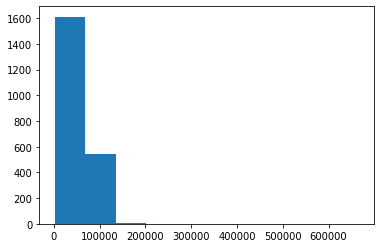

In [15]:
# Histogram 통해 Income 분포 확인
plt.hist(cleaned_data['Income']);

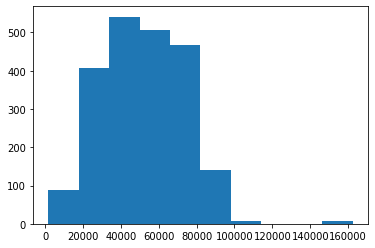

In [16]:
# 200000 기준으로 다시 확인
plt.hist(cleaned_data.loc[cleaned_data['Income'] < 200000, 'Income']);

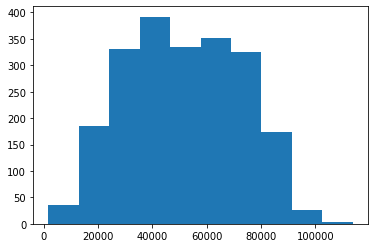

In [17]:
# 120000 기준으로 다시 확인
plt.hist(cleaned_data.loc[cleaned_data['Income'] < 120000, 'Income']);

In [18]:
cleaned_data.loc[cleaned_data['Income'] < 120000, 'Income'].shape[0] / len(cleaned_data)

0.9963048498845266

In [19]:
# 이상치 제거
outlier = cleaned_data.loc[cleaned_data['Income'] >= 120000, 'Income'].index

final = cleaned_data.copy()

final = final.drop(labels=outlier, axis=0).reset_index(drop=True)

final.shape

(2157, 21)

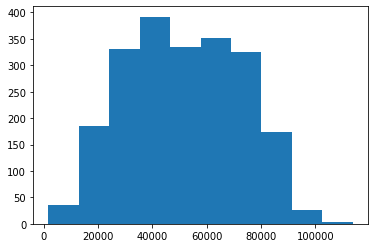

In [20]:
plt.hist(final['Income']);

In [21]:
final.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000
mean,5587.560501,1968.969866,51540.835883,0.442745,0.471025,48.797867,304.955030,26.647195,166.329161,38.099212,27.399166,44.079740,2.289754,4.080668,5.810848,5.330552,0.009272
std,3251.120780,12.011958,20812.255447,0.538059,0.499275,28.894696,337.724758,40.119965,219.172993,54.926772,41.378190,51.639297,1.861870,2.710178,3.244435,2.428888,0.095867
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2815.000000,1959.000000,34916.000000,0.000000,0.000000,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,3.000000,3.000000,0.000000
50%,5474.000000,1970.000000,51195.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,25.000000,2.000000,4.000000,5.000000,6.000000,0.000000
75%,8416.000000,1978.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,235.000000,51.000000,34.000000,56.000000,3.000000,6.000000,8.000000,7.000000,0.000000
max,11191.000000,1996.000000,113734.000000,2.000000,1.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,13.000000,20.000000,1.000000


In [22]:
final.shape[0]

2157

### **2-2. sample의 평균값과 모집단의 평균값을 비교해봅니다.**

- `seed`는 2로 지정하세요.
- 위에서 전처리를 완료한 데이터프레임을 모집단으로 가정한 후, `Income` column의 평균을 구해 `mean_pop` 변수에 저장하세요.
- sample size가 5일 때, 해당 데이터셋의 `Income` 데이터를 10,000번 중복 추출한 표본 평균들을 `sample_5` 라는 이름의 array에 저장하세요.
  - `mean_pop`에서 `sample_5`의 평균을 뺀 값을 `diff_5`에 저장하세요.
- sample size가 200일 때, 해당 데이터셋의 `Income` 데이터를 10,000번 중복 추출한 표본 평균들을 `sample_200` 라는 이름의 array에 저장하세요.
  - `mean_pop`에서 `sample_200`의 평균을 뺀 값을 `diff_200`에 저장하세요.




##### **Q3. `diff_5`, `diff_200`의 결과를 각각 반올림하여 소수점 둘째 자리까지 (`diff_5`, `diff_200`)의 형태로 쓰세요.**

In [23]:
np.random.seed(2)

# mean_pop 지정
mean_pop = final['Income'].mean()

# 5 samples bootstrapping
sample_5 = []

for _ in range(10000):
  sample5 = np.random.choice(final['Income'], 5, replace=True)
  sample_5.append(sample5.mean())

# 200 samples bootstrapping
sample_200 = []

for _ in range(10000):
  sample200 = np.random.choice(final['Income'], 200, replace=True)
  sample_200.append(sample200.mean())

# list to array
sample_5 = np.array(sample_5)
sample_200 = np.array(sample_200)

# mean pop 과의 차이 비교
diff_5 = mean_pop - sample_5.mean()
diff_200 = mean_pop - sample_200.mean()

round(diff_5, 2), round(diff_200, 2)

(-58.6, 12.72)

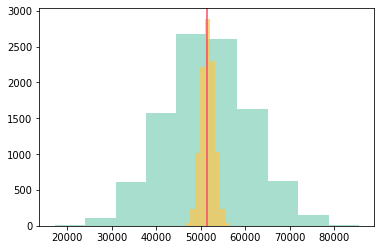

In [24]:
plt.hist(sample_5, alpha=0.5, color='#53BF9D')
plt.hist(sample_200, alpha=0.7, color='#FFC54D')
plt.axvline(mean_pop, color='#F94C66');

In [25]:
mean_pop, sample_5.mean(), sample_200.mean()

(51540.83588317107, 51599.43115999999, 51528.1188555)

### **2-3. sample의 분포를 통해 신뢰구간을 확인합니다.**
**2-2**에서 구현한 `sample_200` 표본 분포를 활용하여 모집단의 모수를 포함할 확률이 95%가 되는 구간을 찾아봅니다.



##### **Q4. 95% 신뢰구간의 lower limit과 upper limit을 각각 반올림하여 소수점 둘째 자리까지 (lower limit, upper limit)의 형태로 쓰세요.**

In [26]:
lower, upper = np.percentile(sample_200, 2.5), np.percentile(sample_200, 97.5)

round(lower, 2), round(upper, 2)

(48668.47, 54390.69)

## **Part 3. Hypothesis Test**

데이터에서 다양한 시나리오를 파악하고 옳은 가설을 세우는 것은 매우 중요합니다. 위에 우리에게 주어진 데이터셋에 대해서도 다양한 시나리오에 대해 생각해볼 수 있습니다.

주어진 데이터셋에는 자녀가 청소년인지 여부를 나타내는 `Teenhome`과 연간 수입을 나타내는 `Income` 정보가 존재하는데, 청소년 자녀가 있는 경우 자녀의 연령에 따라 증가하는 지출, 고객의 회사 내 지위 등을 고려하여 수입이 증가할 것이라는 가설을 생각해 볼 수 있습니다. 

따라서 **고객의 자녀가 청소년인지 여부에 따라 연간 수입 평균값의 차이가 있는지** 가설검정을 통해 확인해보도록 하겠습니다.

### **3-1. One-tailed Test**

> 고객의 자녀가 청소년인 경우의 연간 수입 평균값이 그렇지 않은 경우보다 더 많은지 가설 검증을 시행하고자 합니다.
- 자녀가 청소년인 경우 고객의 연간 수입 평균값: $μ_{yes}$
- 자녀가 청소년이 아닌 경우 고객의 연간 수입 평균값: $μ_{no}$








- 부트스트랩(Bootstrapping)을 활용하여 자녀가 청소년인 경우와 아닌 경우의 차이에 대한 표본분포를 simulate한 뒤, p-value를 확인하여 어떠한 가설을 채택할지 결정하세요.

  - `seed`는 2로 지정합니다.
  - simulate 횟수는 10000번으로 지정합니다.
  - sample의 데이터 수는 위의 데이터프레임과 동일한 사이즈(row 수)로 설정합니다.
  - (`자녀가 청소년인 샘플들의 평균값` - `자녀가 청소년이 아닌 샘플들의 평균값`)으로 차이를 구합니다.

##### **Q5. 이 경우에는 귀무가설과 대립가설을 어떻게 세워야 할까요?**

a. $H_0$: $μ_{no} ≥ μ_{yes}\;$, $\;H_a$: $μ_{no} < μ_{yes}$

b. $H_0$: $μ_{no} < μ_{yes}\;$, $\;H_a$: $μ_{no} ≥ μ_{yes}$

c. $H_0$: $μ_{no} > μ_{yes}\;$, $\;H_a$: $μ_{no} ≤ μ_{yes}$

d. $H_0$: $μ_{no} ≤ μ_{yes}\;$, $\;H_a$: $μ_{no} > μ_{yes}$

</br>


In [27]:
# seed는 2로 지정합니다.
np.random.seed(2)

# Teenhome 값에 따른 분류
yes_means, no_means, diff_means = [], [], []

# Bootstrapping
for _ in range(10000):
  sample = final.sample(final.shape[0], replace=True)

  yes_mean = sample.loc[sample['Teenhome'] == True, 'Income'].mean()
  yes_means.append(yes_mean)

  no_mean = sample.loc[sample['Teenhome'] == False, 'Income'].mean()
  no_means.append(no_mean)

  diff_means.append(yes_mean - no_mean)

In [28]:
# sample statistics
sample_diff_mean = final.loc[final['Teenhome'] == True, 'Income'].mean() - final.loc[final['Teenhome'] == False, 'Income'].mean()
sample_diff_mean

1386.8917089926617

In [29]:
sample_diff_std = np.std(diff_means)
sample_diff_std

863.6799000927975

In [30]:
np.random.seed(2)

null_vals = np.random.normal(0, sample_diff_std, 10000)

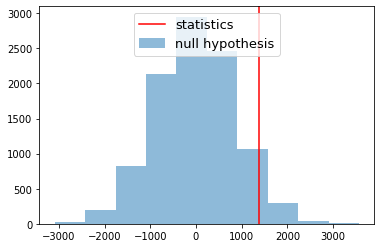

In [31]:
plt.hist(null_vals, alpha=0.5, label='null hypothesis')
plt.axvline(sample_diff_mean, color='r', label='statistics')
plt.legend(loc=9, fontsize=13)

In [32]:
(null_vals > sample_diff_mean).mean()

0.0537

##### **Q6. 다음 중 위의 가설검정 결과로 나온 p-value를 통해 도출한 결론을 고르세요.** 

a. p-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.

**b. p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다.**

c. p-value가 0.05보다 작으므로 귀무가설을 기각하지 못한다.

d. p-value가 0.05보다 크므로 귀무가설을 기각하고 대립가설을 채택한다.

e. p-value가 0.05보다 크므로 귀무가설과 대립가설 모두를 채택한다.

### **3-2. Two-tailed Test**

> 고객의 자녀가 청소년인 경우의 연간 수입 평균값이 그렇지 않은 경우와 차이가 있는지 가설검정을 시행하고자 합니다.
- 자녀가 청소년인 경우 고객의 연간 수입 평균값: $μ_{yes}$
- 자녀가 청소년이 아닌 경우 고객의 연간 수입 평균값: $μ_{no}$

- 이번 문제에서는 scipy 라이브러리의 [`.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)를 사용하여 가설검정을 진행하세요.






##### **Q7. 이 경우에는 귀무가설과 대립가설을 어떻게 세워야 할까요?** 

a. $H_0$: $μ_{no} \neq\; μ_{yes}\;$, $\;H_a$: $μ_{no} = \;μ_{yes}$

b. $H_0$: $μ_{no} < μ_{yes}\;$, $\;H_a$: $μ_{no} ≥ μ_{yes}$

c. $H_0$: $μ_{no} =\; μ_{yes}\;$, $\;H_a$: $μ_{no} \neq \;μ_{yes}$ 

d. $H_0$: $μ_{no} ≤ μ_{yes}\;$, $\;H_a$: $μ_{no} > μ_{yes}$

</br>







##### **Q8. 위의 가설 검정 결과로 나온 p-value를 반올림하여 소수점 둘째 자리까지 쓰세요.**

In [33]:
from scipy import stats

In [34]:
yes = final.loc[final['Teenhome'] == True, 'Income']
no = final.loc[final['Teenhome'] == False, 'Income']

pval = stats.ttest_ind(yes, no, equal_var = False).pvalue

round(pval, 2)

0.11

## **Part 4. 도전 과제**

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아래 내용 또한 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항은 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

---

#### **$\chi^2$ 가설 검정을 시행합니다**

우리가 사용할 $\chi^2$ - test는 어떤 경우에 사용하는 가설 검정 방법인지 알아봅시다.


- one sample $\chi^2$ - test (적합도 검정)
  > **주어진 하나의 범주형 변수의 분포가 특정 예상되는 분포와 동일한 분포를 나타내는지** 에 대한 가설 검정 방법

  - 귀무가설($H_0$): 주어진 변수 X의 관측분포와 특정 예상 분포가 동일하다.
  - 대립가설($H_a$): 주어진 변수 X의 관측분포와 특정 예상 분포가 다르다.

- two sample $\chi^2$ - test (독립성 검정)
  > **두 개의 범주형 변수가 서로 연관되어 있는지 여부**에 대한 가설 검정 방법

  - 귀무가설($H_0$): 변수 X와 Y는 서로 독립이다. (연관 없음)
  - 대립가설($H_a$): 변수 X와 Y는 서로 독립이 아니다. (연관 있음)

</br>

위의 가설검정 방법에 대한 설명을 참고하여 진행해봅니다.


### **4-1. one sample $\chi^2$ - test**

> XYZ사는 다국적 기업으로 다양한 나라에 고객층을 확보하고 있으며, 5월을 맞아 **기혼자를 대상으로 한 이벤트를 기획**하려고 합니다. 이때, 우리는 모든 국가를 대상으로 이벤트를 진행하는 것이 효율적인지 $\chi^2$ - test를 통해 확인해보려 합니다. 만약 국적별 기혼자의 빈도가 비슷하다면, XYZ사는 모든 국가를 대상으로 이벤트를 진행하는 것을 고려할 것이고, 그렇지 않다면, 어떤 국적의 고객이 더 많은지 파악하는 추가 분석이 필요할 것입니다.


#### **기혼자의 빈도가 모든 나라에 대해 균일한지 가설 검정을 해보세요.**

---

[공식문서](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)를 참고하여 아래에 명시된 가설을 검정해봅시다. ($\alpha$ = 0.05)
- 귀무가설($H_0$): 고객의 국적(Country)별 기혼자(Married)의 빈도가 균일하게 분포되어 있다.
- 대립가설($H_a$): 고객의 국적(Country)별 기혼자(Married)의 빈도가 균일하게 분포되어 있지 않다.

> **Hint:** categorical feature 간의 "cross tab"을 생성하여 탐색해 보세요 (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)). 그리고 $\chi^2 test$를 적용해 보세요. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)을 사용하면 contingency table 을 생성할 수 있습니다.

In [35]:
from scipy.stats import chisquare

# 국적 - 결혼상태 crosstab 생성
country_marital = pd.crosstab(final['Country'], final['Marital_Status'])
country_marital

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Country,,,,,,,,
AUS,1,0,18,65,17,37,5,0
CA,1,3,26,97,57,64,6,1
GER,0,0,6,56,18,31,4,0
IND,0,0,10,55,36,38,4,1
ME,0,0,0,0,2,1,0,0
SA,0,0,45,104,70,97,12,0
SP,0,0,104,422,233,265,42,0
US,0,0,16,33,29,23,2,0


In [36]:
# 기혼('Married') 상태에 해당하는 데이터만 추출
married = country_marital.loc[:,'Married']
married

Country
AUS     65
CA      97
GER     56
IND     55
ME       0
SA     104
SP     422
US      33
Name: Married, dtype: int64

In [37]:
# 기혼자 명수 총합
married_ppl = sum(married)
married_ppl

832

In [38]:
# 국적 수
len(final['Country'].unique())

8

In [39]:
# 기혼('Married')에 해당하는 전체 데이터 수를 국적 수(8)으로 나눈 빈도 = 우리의 기대 분포 (국적별 빈도가 균일함)
exp = [married_ppl / 8]
exp_f = exp * 8
exp_f

[104.0, 104.0, 104.0, 104.0, 104.0, 104.0, 104.0, 104.0]

In [40]:
# option 1) chisquare f_exp 파라미터 지정 X
stats, pvalue = chisquare(married)
pvalue

1.1461219475051596e-251

In [41]:
# option 2) 실제 분포와 기대 분포 직접 비교
stats2, pvalue2 = chisquare(married, exp_f)
pvalue2

1.1461219475051596e-251

### **4-2. P-value 해석**



#### **가설검정 결과로 나온 p-value를 바탕으로 결론을 제시하세요.**

귀무가설을 바탕으로 시행한 가설 검정 결과 P-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.


> 즉, 국적별로 기혼자의 분포는 다르다고 결론지을 수 있다. 따라서 XYZ 사에서는 어떤 국적의 기혼자가 많은지 확인하는 추가 분석을 시행할 필요성이 있다. 